# KNN Practice Through Car Pricing

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cars = pd.read_csv('imports-85.data', header=None)

In [3]:
cars.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


As we can see, the dataset has no header column. Luckily for us, the documentation has the attributes and descriptions listed out on their website.<br>
We are going to copy and paste their attributes from their website, clean it up to only include the attribute name.

In [4]:
attributes = "symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price"

In [5]:
attributes = attributes.split(',')

In [6]:
cars.columns = attributes
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
cars['normalized-losses'].replace("?", np.nan, inplace=True)

In [8]:
cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [9]:
cars['num-of-doors'].replace({'four': 4, 'two': 2, '?': np.nan}, inplace=True)

In [10]:
cars['num-of-cylinders'].replace({'four': 4, 'two': 2, 'six': 6, 'five': 5, 'eight': 8, 'twelve': 12, 'three': 3}, inplace=True)
cars['num-of-cylinders'] = cars['num-of-cylinders'].astype(int)
cars['num-of-cylinders'].value_counts(dropna=False)

4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: num-of-cylinders, dtype: int64

In [11]:
for col in ['bore', 'stroke', 'horsepower', 'peak-rpm', 'price']:
    cars[col].replace('?', np.nan, inplace=True)
    cars[col] = cars[col].astype(float)

In [12]:
cars[cars['normalized-losses'].isnull()].isnull().sum().sum()

50

In [13]:
cars.isnull().sum().sum()

59

In [14]:
normalized_mean = cars[cars['normalized-losses'].notnull()]['normalized-losses'].astype(float).mean()

In [15]:
normalized_mean

122.0

In [16]:
cars['normalized-losses'].fillna(normalized_mean, inplace=True)

In [17]:
cars['normalized-losses'] = cars['normalized-losses'].astype(float)

In [18]:
cars.dropna(inplace=True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   normalized-losses  193 non-null    float64
 2   make               193 non-null    object 
 3   fuel-type          193 non-null    object 
 4   aspiration         193 non-null    object 
 5   num-of-doors       193 non-null    float64
 6   body-style         193 non-null    object 
 7   drive-wheels       193 non-null    object 
 8   engine-location    193 non-null    object 
 9   wheel-base         193 non-null    float64
 10  length             193 non-null    float64
 11  width              193 non-null    float64
 12  height             193 non-null    float64
 13  curb-weight        193 non-null    int64  
 14  engine-type        193 non-null    object 
 15  num-of-cylinders   193 non-null    int64  
 16  engine-size        193 non

In [19]:
columns_to_keep = ['symboling', 'num-of-doors', 'num-of-cylinders', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'compression-ratio', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
lmt_cars = cars[columns_to_keep].copy()
lmt_price = lmt_cars['price']
lmt_cars.head(10)

,symboling,num-of-doors,num-of-cylinders,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,2.0,4,122.0,88.6,168.8,64.1,48.8,2548,130,9.0,3.47,2.68,111.0,5000.0,21,27,13495.0
1,3,2.0,4,122.0,88.6,168.8,64.1,48.8,2548,130,9.0,3.47,2.68,111.0,5000.0,21,27,16500.0
2,1,2.0,6,122.0,94.5,171.2,65.5,52.4,2823,152,9.0,2.68,3.47,154.0,5000.0,19,26,16500.0
3,2,4.0,4,164.0,99.8,176.6,66.2,54.3,2337,109,10.0,3.19,3.40,102.0,5500.0,24,30,13950.0
4,2,4.0,5,164.0,99.4,176.6,66.4,54.3,2824,136,8.0,3.19,3.40,115.0,5500.0,18,22,17450.0
5,2,2.0,5,122.0,99.8,177.3,66.3,53.1,2507,136,8.5,3.19,3.40,110.0,5500.0,19,25,15250.0
6,1,4.0,5,158.0,105.8,192.7,71.4,55.7,2844,136,8.5,3.19,3.40,110.0,5500.0,19,25,17710.0
7,1,4.0,5,122.0,105.8,192.7,71.4,55.7,2954,136,8.5,3.19,3.40,110.0,5500.0,19,25,18920.0
8,1,4.0,5,158.0,105.8,192.7,71.4,55.9,3086,131,8.3,3.13,3.40,140.0,5500.0,17,20,23875.0
10,2,2.0,4,192.0,101.2,176.8,64.8,54.3,2395,108,8.8,3.50,2.80,101.0,5800.0,23,29,16430.0


In [20]:
scaler = MinMaxScaler()
cols_to_normalize = lmt_cars.columns.tolist()
cols_to_normalize.remove('price')
cars_norm = pd.DataFrame(scaler.fit_transform(lmt_cars[cols_to_normalize]), columns = cols_to_normalize)
lmt_price.reset_index(drop=True, inplace=True)
cars_norm['price'] = lmt_price

In [21]:
cars_norm.head(10)

,symboling,num-of-doors,num-of-cylinders,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.0,0.0,0.111111,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.12500,0.664286,0.290476,0.294393,0.346939,0.222222,0.289474,13495.0
1,1.0,0.0,0.111111,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.12500,0.664286,0.290476,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.6,0.0,0.333333,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.12500,0.100000,0.666667,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.8,1.0,0.111111,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.18750,0.464286,0.633333,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.8,1.0,0.222222,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.06250,0.464286,0.633333,0.313084,0.551020,0.138889,0.157895,17450.0
5,0.8,0.0,0.222222,0.298429,0.384840,0.540299,0.512821,0.441667,0.395268,0.283019,0.09375,0.464286,0.633333,0.289720,0.551020,0.166667,0.236842,15250.0
6,0.6,1.0,0.222222,0.486911,0.559767,0.770149,0.948718,0.658333,0.525989,0.283019,0.09375,0.464286,0.633333,0.289720,0.551020,0.166667,0.236842,17710.0
7,0.6,1.0,0.222222,0.298429,0.559767,0.770149,0.948718,0.658333,0.568658,0.283019,0.09375,0.464286,0.633333,0.289720,0.551020,0.166667,0.236842,18920.0
8,0.6,1.0,0.222222,0.486911,0.559767,0.770149,0.948718,0.675000,0.619860,0.264151,0.08125,0.421429,0.633333,0.429907,0.551020,0.111111,0.105263,23875.0
9,0.8,0.0,0.111111,0.664921,0.425656,0.532836,0.384615,0.541667,0.351823,0.177358,0.11250,0.685714,0.347619,0.247664,0.673469,0.277778,0.342105,16430.0


In [22]:
cars_norm[cars_norm['price'].isnull()]['price']

Series([], Name: price, dtype: float64)

In [63]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
    df_length = len(df)
    shuffled_df = df.loc[np.random.permutation(df_length)].reset_index(drop=True)
    half_point = (df_length // 2) + 1
    train_df = shuffled_df[:half_point]
    test_df = shuffled_df[half_point:]
    knn = KNeighborsRegressor()
    knn.fit(train_df[[train_col]], train_df[target_col])
    predictions = knn.predict(test_df[[train_col]])
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    return rmse

In [64]:
first_test = {}
for col in columns_to_keep:
    first_test[col] = knn_train_test(col, 'price', cars_norm)

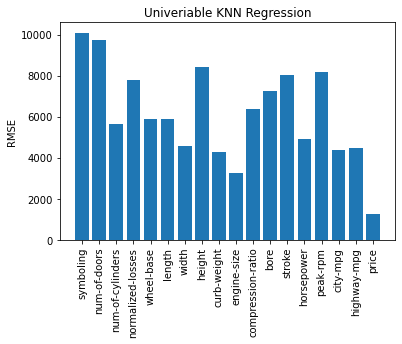

In [65]:
plt.bar(range(len(first_test)), list(first_test.values()), align='center')
plt.xticks(range(len(first_test)), list(first_test.keys()), rotation = 90)
plt.ylabel('RMSE')
plt.title('Univeriable KNN Regression')
plt.show()

In [66]:
def knn_train_test_k(train_col, target_col, df, k):
    np.random.seed(1)
    df_length = len(df)
    shuffled_df = df.loc[np.random.permutation(df_length)].reset_index(drop=True)
    half_point = (df_length // 2) + 1
    train_df = shuffled_df[:half_point]
    test_df = shuffled_df[half_point:]
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(train_df[[train_col]], train_df[target_col])
    predictions = knn.predict(test_df[[train_col]])
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    return rmse

In [67]:
k_tests = [1, 3, 5, 7, 9]
second_test = pd.DataFrame(index=k_tests, columns=columns_to_keep)
for col in columns_to_keep:
    for i in k_tests:
        second_test[col][i] = (knn_train_test_k(col, 'price', cars_norm, i))

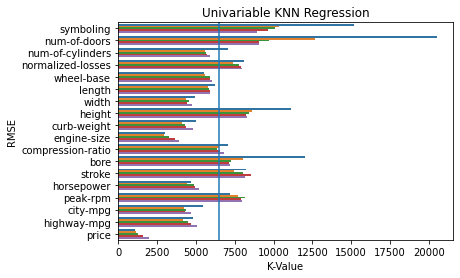

In [68]:
second_test_melt = second_test.reset_index().melt('index', var_name='cols', value_name='vals')
g = sns.barplot(data=second_test_melt, y='cols', x='vals', hue='index', orient='h')
g.legend_.remove()
plt.title('Univariable KNN Regression')
plt.ylabel('RMSE')
plt.xlabel('K-Value')
plt.axvline(second_test_melt['vals'].mean())
plt.show()

In [69]:
def knn_train_test_mult_cols(train_col, target_col, df):
    np.random.seed(1)
    df_length = len(df)
    shuffled_df = df.loc[np.random.permutation(df_length)].reset_index(drop=True)
    half_point = (df_length // 2) + 1
    train_df = shuffled_df[:half_point]
    test_df = shuffled_df[half_point:]
    knn = KNeighborsRegressor(n_neighbors = 5)
    knn.fit(train_df[train_col], train_df[target_col])
    predictions = knn.predict(test_df[train_col])
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    return rmse

In [70]:
second_test

,symboling,num-of-doors,num-of-cylinders,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg,price
1,15202.298311,20511.537414,7046.705663,8110.879515,5539.328175,6225.444385,4949.92584,11104.03381,5032.540768,2991.085977,7098.361486,11994.046481,8227.238007,4683.008679,7201.339859,5482.580814,4808.723566,1075.961944
3,10368.769056,12680.535886,5603.191136,7376.999812,5613.516895,5812.914569,4398.711107,8605.058268,4138.688672,2976.826478,6513.154339,8056.004752,7437.611349,4431.483593,7697.526176,4244.355793,4200.594125,1132.044022
5,10081.001868,9713.949433,5651.892097,7804.752512,5902.382125,5872.339426,4565.61589,8419.380882,4297.160398,3266.10323,6382.342011,7273.264033,8040.282846,4904.778715,8172.222343,4356.658417,4468.931087,1285.112779
7,9661.015282,9063.988854,5736.047642,7914.103639,5904.289464,5884.84113,4447.398872,8214.27042,4372.359097,3645.786215,6566.790905,7145.329055,8581.361756,4960.379078,7892.884861,4296.695213,4713.471071,1611.380586
9,8932.415191,9064.241953,5891.411881,7948.102217,6057.382214,5917.856188,4752.08788,8264.483834,4798.339321,3940.704408,6839.130538,7227.167271,8190.57635,5182.484726,7950.755632,4690.618264,5059.776951,1968.303675


In [71]:
means = second_test.mean().sort_values()
means

price                 1414.560601
engine-size           3364.101262
curb-weight           4527.817651
city-mpg              4614.181700
width                 4622.747918
highway-mpg           4650.299360
horsepower            4832.426958
wheel-base            5803.379775
length                5942.679139
num-of-cylinders      5985.849684
compression-ratio     6679.955856
peak-rpm              7782.945774
normalized-losses     7830.967539
stroke                8095.414062
bore                  8339.162318
height                8921.445443
symboling            10849.099942
num-of-doors         12206.850708
dtype: float64

In [74]:
def top_x_means(amount):
    return means[1:amount+1].index.tolist()

two_best = top_x_means(2)
three_best = top_x_means(3)
four_best = top_x_means(4)
five_best = top_x_means(5)
bests = [two_best, three_best, four_best, five_best]
bests

[['engine-size', 'curb-weight'],
 ['engine-size', 'curb-weight', 'city-mpg'],
 ['engine-size', 'curb-weight', 'city-mpg', 'width'],
 ['engine-size', 'curb-weight', 'city-mpg', 'width', 'highway-mpg']]

In [75]:
third_test = {}
for i in range(len(bests)):
    index = i+2
    third_test[index] = knn_train_test_mult_cols(bests[i], 'price', cars_norm)
third_test

{2: 3395.090700064826,
 3: 3701.380978826236,
 4: 3750.9522821433848,
 5: 3658.9598791869803}

In [76]:
def knn_train_test_mult_cols_k(train_col, target_col, df, k):
    np.random.seed(1)
    df_length = len(df)
    shuffled_df = df.loc[np.random.permutation(df_length)]
    half_point = (df_length // 2) + 1
    train_df = shuffled_df[:half_point]
    test_df = shuffled_df[half_point:]
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(train_df[train_col], train_df[target_col])
    predictions = knn.predict(test_df[train_col])
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    return rmse

In [77]:
hyper_params = range(1, 26)
fourth_test = {'3_best': [], '4_best': [], '5_best': []}
best_of_bests = [three_best, four_best, five_best]
best_names = ['3_best', '4_best', '5_best']
for best in range(len(best_of_bests)):
    for i in hyper_params:
        fourth_test[best_names[best]].append(knn_train_test_mult_cols_k(best_of_bests[best], 'price', cars_norm, i))

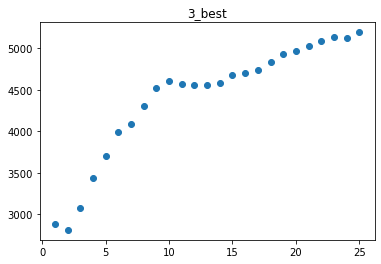

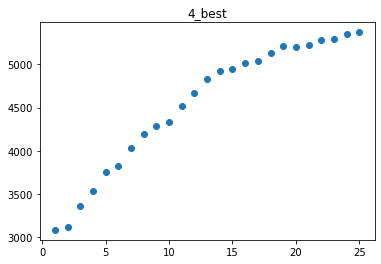

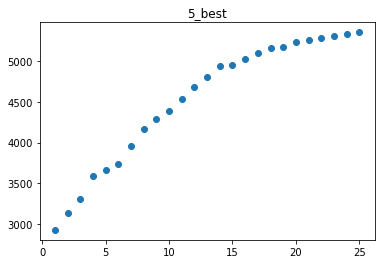

In [78]:
for test in fourth_test:
    plt.scatter(y=fourth_test[test], x=hyper_params)
    plt.title(test)
    plt.show()